In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
FILE_PATH = 'imoveis.xlsx'

df = pd.read_excel(FILE_PATH)
df.head(5)

,area,preco
0,359.87,25000
1,353.12,45000
2,341.89,45000
3,435.99,20000
4,341.77,25000


In [3]:
df.describe().round(2)

,area,preco
count,54.00,54.00
mean,457.48,41296.30
std,261.53,16488.57
min,293.22,20000.00
25%,355.09,30000.00
50%,380.36,40000.00
75%,470.09,50000.00
max,2057.57,120000.00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   area    54 non-null     float64
 1   preco   54 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 996.0 bytes


c:\Users\jeanl\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='area', ylabel='Count'>

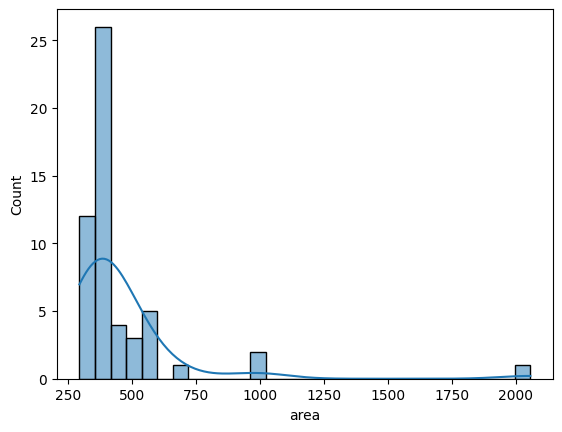

In [5]:
sns.histplot(df, x='area', kde=True)

c:\Users\jeanl\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='preco', ylabel='Count'>

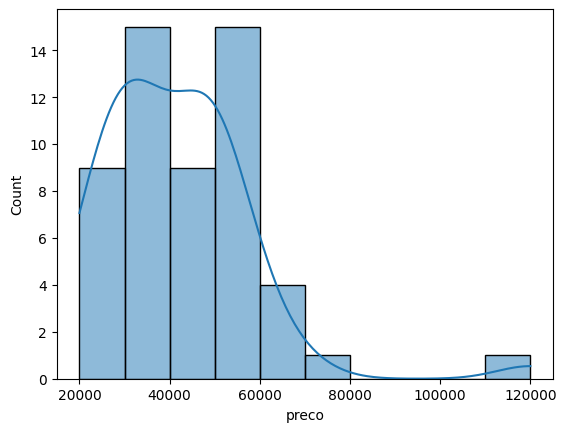

In [6]:
sns.histplot(df, x='preco', kde=True)

In [7]:
df.corr()

,area,preco
area,1.000000,0.511373
preco,0.511373,1.000000


<Axes: xlabel='area', ylabel='preco'>

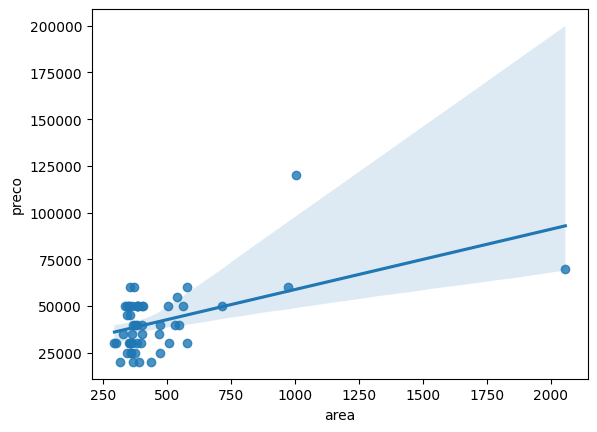

In [8]:
sns.regplot(x='area', y='preco', data=df)

In [9]:
df.describe().round(2)

,area,preco
count,54.00,54.00
mean,457.48,41296.30
std,261.53,16488.57
min,293.22,20000.00
25%,355.09,30000.00
50%,380.36,40000.00
75%,470.09,50000.00
max,2057.57,120000.00


In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
scaler  = MinMaxScaler()
df_norm = pd.DataFrame(scaler.fit_transform(df), index=df.index, columns=df.columns)
df_norm.head(5)

,area,preco
0,0.037776,0.05
1,0.033950,0.25
2,0.027585,0.25
3,0.080919,0.00
4,0.027517,0.05


In [12]:
df_norm.describe()

,area,preco
count,54.000000,54.000000
mean,0.093101,0.212963
std,0.148229,0.164886
min,0.000000,0.000000
25%,0.035065,0.100000
50%,0.049389,0.200000
75%,0.100245,0.300000
max,1.000000,1.000000


<Axes: xlabel='area', ylabel='preco'>

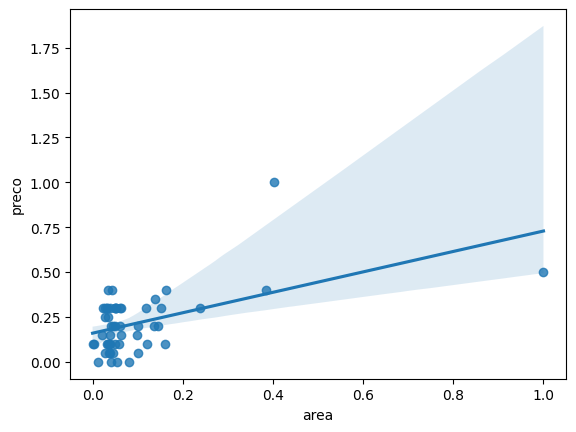

In [13]:
sns.regplot(x='area', y='preco', data=df_norm)

In [14]:
import statsmodels.formula.api as smf

In [15]:
func  = 'preco~area'
model = smf.ols(formula=func, data=df_norm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  preco   R-squared:                       0.262
Model:                            OLS   Adj. R-squared:                  0.247
Method:                 Least Squares   F-statistic:                     18.41
Date:                Sat, 17 Feb 2024   Prob (F-statistic):           7.76e-05
Time:                        15:24:35   Log-Likelihood:                 29.402
No. Observations:                  54   AIC:                            -54.80
Df Residuals:                      52   BIC:                            -50.83
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1600      0.023      6.942      0.0

In [16]:
y = df_norm['preco']
X = df_norm[['area']]

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [19]:
print(f'R² -> {model.score(X_train, y_train).round(2)}')

R² -> 0.28


In [24]:
y_pred = model.predict(X_test)

In [29]:
print(f'MAE  -> {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'MSE  -> {metrics.mean_squared_error(y_test, y_pred)}')
print(f'RMSE -> {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}')

MAE  -> 0.11398033781848144
MSE  -> 0.018876884889447994
RMSE -> 0.13739317628415174


In [28]:
print(f'R² = {metrics.r2_score(y_test, y_pred).round(2)}')

R² = 0.14
